In [145]:
import numpy as np

tend = 2
mesh_sizes = np.array([40, 80, 160, 320, 640])
err_l1 = np.zeros(n:=len(mesh_sizes))
err_l2 = np.zeros(n)
err_linf = np.zeros(n)

for i,N in enumerate(mesh_sizes):
    dx = 1/N
    dt = 1/(4*N) # <= 1/(2N)
    c = 2*dt/dx
    x = np.linspace(0,1,N)
    # Initial values:
    u = np.sin(2*np.pi*x)
    # FTBS Matrix:
    M = np.diag((1-c)*np.ones(N)) + np.diag(c*np.ones(N-1),-1)
    M[0,-1] = c
    for _ in range(int(tend/dt)):
        u = M@u
    err_l1[i] = np.sum(np.abs(u-u_exact(x,tend)))
    err_l2[i] = np.sqrt(np.sum((np.abs(u-u_exact(x,tend)))**2))
    err_linf[i] = np.max(np.abs(u-u_exact(x,tend)))




In [146]:
def u_exact(x,t):
    return np.sin(2*np.pi*(x-2*t))

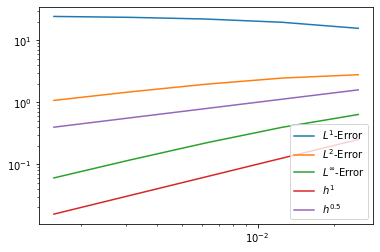

In [152]:
import matplotlib.pyplot as plt

# plt.plot(x,np.abs(u-u_exact(x,tend)))
mesh_widths = 1/mesh_sizes
plt.loglog(mesh_widths, err_l1, label="$L^{1}$-Error")
plt.loglog(mesh_widths, err_l2, label="$L^{2}$-Error")
plt.loglog(mesh_widths, err_linf, label="$L^{\infty}$-Error")
plt.loglog(mesh_widths, 10*mesh_widths, label="$h^{1}$")
plt.loglog(mesh_widths, 10*mesh_widths**0.5, label="$h^{0.5}$")
plt.legend()

In [149]:
print(err_l1)
print(err_l2)
print(err_linf)

[15.56932114 19.49012925 21.98462632 23.419565   24.21008092]
[2.77672504 2.45180369 1.95147204 1.46667567 1.06968189]
[0.63301592 0.39355694 0.22064638 0.11673426 0.06000269]
